In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import pandas as pd

In [2]:
lst=[]
n=int(input("Enter no.of layers :"))
for i in range(0,n):
    m=int(input())
    lst.append(m)
print(lst)
maxdim = max(lst)
out = np.zeros((len(lst),maxdim))
for i in range(len(out)):    
    out[i][:lst[i]]=1 
print("The First Matrix is: \n")
print(out.T)
dim = sum(lst)
second_matrix = np.zeros((dim,dim))
rownum = 0
col = lst[0]
for j in range(len(lst)-1):    
    r = lst[j]
    c = lst[j+1]
    for j in range(rownum,rownum+r):
        second_matrix[j][col:col+c]=1        
    rownum = rownum+r        
    col = col+c
print("The Second Matrix is: \n")
print(second_matrix)

umbr=np.random.uniform(0,1,size=(sum(lst),1))
beta=np.random.randint(0,10,size=(sum(lst),1))
kr=np.random.randint(-5,4,size=(sum(lst),1))
maxcount=np.random.randint(10,90,size=(sum(lst),1))
matrix=np.concatenate((umbr.T,beta.T,kr.T,maxcount.T)).T
print("The Third Matrix is: \n")
print(matrix)
output = second_matrix

matrix_size = sum(lst)*sum(lst)
print("Size of the matix: \n")
print(matrix_size)
feedback_percent = int(input("Enter feedback percent: \n"))
feedback = math.floor((feedback_percent/100) * matrix_size)
print("No. of Ones in the vector: \n")
print(feedback)

vector=np.random.randint(0,2,size=(sum(lst),sum(lst)))
count=0 
        
rev_vector = vector[::-1]

for r in range(0,len(rev_vector[0]-1)):
    for c in range(0,len(rev_vector[0]-1)):
        if rev_vector[r][c] == 1:
            count = count+1
            if count > feedback:
                rev_vector[r][c] = 0
                
vector = rev_vector[::-1]

        
print("The Vector is : \n")
print(vector)

for x in range(len(vector)):
    for y in range(len(output[0])):
        for z in range(len(output)):
            if (output[x][z]==1.0):
                continue
            else:
                mul=vector[x][z]*output[z][y]
                if mul>0.0:
                    output[x][z]=1.0
                    
for i in range(2, len(output[0])-1):
    for j in range(2, len(output)-1):
        output[i][j]=0.0

print("Matrix after Multiplication: \n")
print(output)

Enter no.of layers :3
2
3
1
[2, 3, 1]
The First Matrix is: 

[[1. 1. 1.]
 [1. 1. 0.]
 [0. 1. 0.]]
The Second Matrix is: 

[[0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]
The Third Matrix is: 

[[ 0.58186373  3.          2.         64.        ]
 [ 0.27833041  2.         -2.         41.        ]
 [ 0.16610227  4.          2.         29.        ]
 [ 0.42885627  3.         -5.         27.        ]
 [ 0.23763301  2.         -3.         80.        ]
 [ 0.64804058  1.         -3.         61.        ]]
Size of the matix: 

36
Enter feedback percent: 
20
No. of Ones in the vector: 

7
The Vector is : 

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 1 0 1 0]
 [0 0 0 0 1 1]]
Matrix after Multiplication: 

[[0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1.]]


In [3]:
class Neuroid:
    def __init__(self, umbr, beta, kr, maxcount, t, log=False):
        self.log = log

        self.umbr = umbr
        self.beta = beta
        self.kr = kr
        self.maxcount = maxcount
        self.t = t

        self.count1 = 0
        self.count2 = 0

        self.y = 0
        self.nt_out = 0
        self.time = 0

        self.sum_stream = []
        self.count1_stream = []
        self.count2_stream = []
        self.y_stream = []
        self.nt_out_stream = []

    def run_comparator(self, inputs, weights):
        input_sum = round(sum(inputs), 3)
        
        if input_sum > self.umbr:
            if self.count1 > self.beta / (input_sum - self.umbr):
                self.count1 = 0
            else:
                self.count1 += 1
        else:
            self.count1 = 0
        
        
        
        if self.log:
            self.sum_stream.append(input_sum)
            self.count1_stream.append(self.count1)
    
    def run_freq_modulator(self):
        if self.count1 == 1:
            self.y = 1
        else:
            self.y = 0

        if self.log:
            self.y_stream.append(self.y)

    def run_freq_demodulator(self):
        if self.y == 1 & self.count2 != 0:
            self.nt_out = self.kr / self.count2
            self.count2 = 0
        else:
            self.count2 += 1

        if self.count2 > self.maxcount:
            self.nt_out = 0

        self.nt_out_stream.append(self.nt_out)

        if self.log:
            self.count2_stream.append(self.count2)

    def get_axon_signal(self, inputs, weights):
        if len(inputs) != len(weights):
            raise Exception("Size of inputs and size of weights must be the same!")
        y_t = []
        for i in range(len(weights) - self.t + 1):
            self.run_comparator(inputs[i:(i + self.t)], weights[i:(i + self.t)])
            self.run_freq_modulator()
            y_t.append(self.y)
            return y_t
    
    def run_neuroid(self, inputs, weights):
        if len(inputs) != len(weights):
            raise Exception("Size of inputs and size of weights must be the same!")
        for i in range(len(weights) - self.t + 1):
            self.run_comparator(inputs[i:(i + self.t)], weights[i:(i + self.t)])
            self.run_freq_modulator()
            self.run_freq_demodulator()
            self.time += 1

            if self.log:
                print("======= Time", self.time, "=======")
                print("nt_out =", self.nt_out)
                print("y =", self.y)
                print("count1 =", self.count1)
                print("count2 =", self.count2)
                print()
        return self.nt_out_stream

def run(umbr, beta, kr, maxcount, log=False):
    inputs = [round(i / 1000, 3)for i in range(1001)] + [round(i / 1000, 3) for i in reversed(range(1000))]
    weights = [0 for i in range(2001)]

    neuroid = Neuroid(umbr=umbr, beta=beta, kr=kr, maxcount=maxcount, t=1, log=log)
    neuroid.run_neuroid(inputs, weights)

    return {"output": neuroid.nt_out_stream}

def use_prev_output(output, umbr, beta, kr, maxcount, log=False):
    inputs = output
    weights = [0 for i in range(2001)]

    neuroid = Neuroid(umbr=umbr, beta=beta, kr=kr, maxcount=maxcount, t=1, log=log)
    neuroid.run_neuroid(inputs, weights)

    return {"output": neuroid.nt_out_stream}

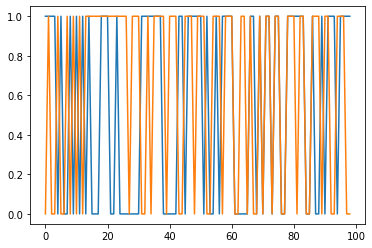

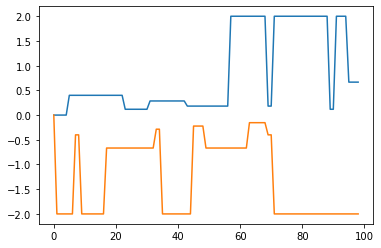

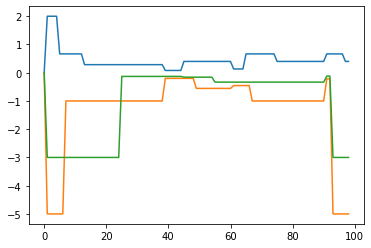

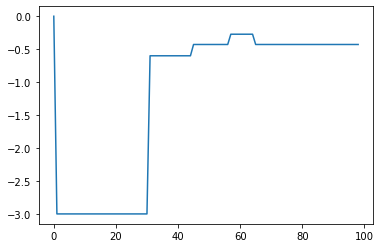

In [4]:
data = pd.read_excel("AND gate inputs.xlsx",sheet_name='Data 1')
A =data["Input A"]
ran = len(A)
B =data["Input B"]

weights1 = [0 for i in range(len(A))]
weights2 = [0 for i in range(len(B))]

plt.plot(A)
plt.plot(B)
plt.show()

A1 = Neuroid(umbr=matrix[0][0], beta=matrix[0][1], kr=matrix[0][2], maxcount=matrix[0][3], t=1)
A2 = Neuroid(umbr=matrix[1][0], beta=matrix[1][1], kr=matrix[1][2], maxcount=matrix[1][3], t=1)
y1 = A1.run_neuroid(inputs= A, weights = weights1)
y2 = A2.run_neuroid(inputs= B, weights = weights2)

plt.plot(y1)
plt.plot(y2)
plt.show()

B1 = Neuroid(umbr=matrix[2][0], beta=matrix[2][1], kr=matrix[2][2], maxcount=matrix[2][3], t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weights3 = [0 for i in range(len(inputs_combined))]
y3 = B1.run_neuroid(inputs=inputs_combined, weights=weights3)


B2 = Neuroid(umbr=matrix[3][0], beta=matrix[3][1], kr=matrix[3][2], maxcount=matrix[3][3], t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weights3 = [0 for i in range(len(inputs_combined))]
y4 = B2.run_neuroid(inputs=inputs_combined, weights=weights3)


B3 = Neuroid(umbr=matrix[4][0], beta=matrix[4][1], kr=matrix[4][2], maxcount=matrix[4][3], t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weights3 = [0 for i in range(len(inputs_combined))]
y5 = B3.run_neuroid(inputs=inputs_combined, weights=weights3)


plt.plot(y3)
plt.plot(y4)
plt.plot(y5)
plt.show()

C1 = Neuroid(umbr=matrix[5][0], beta=matrix[5][1], kr=matrix[5][2], maxcount=matrix[5][3], t=1)
inputs_combined = [x-y-z for x,y,z in zip(y3,y4,y5)]
weights3 = [0 for i in range(len(inputs_combined))]
y6 = C1.run_neuroid(inputs=inputs_combined, weights=weights3)

plt.plot(y6)
plt.show()

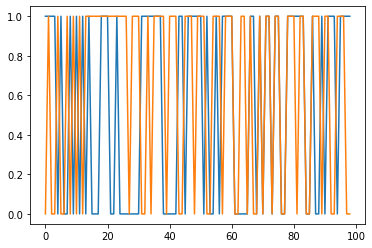

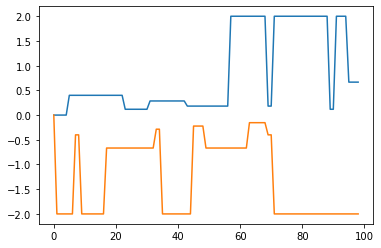

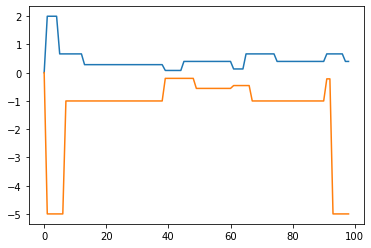

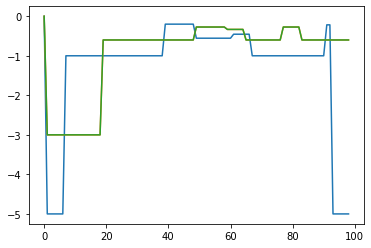

In [5]:
data = pd.read_excel("AND gate inputs.xlsx",sheet_name='Data 1')
A =data["Input A"]
ran = len(A)
B =data["Input B"]

weights1 = [0 for i in range(len(A))]
weights2 = [0 for i in range(len(B))]

plt.plot(A)
plt.plot(B)
plt.show()

A1 = Neuroid(umbr=matrix[0][0], beta=matrix[0][1], kr=matrix[0][2], maxcount=matrix[0][3], t=1)
A2 = Neuroid(umbr=matrix[1][0], beta=matrix[1][1], kr=matrix[1][2], maxcount=matrix[1][3], t=1)
y1 = A1.run_neuroid(inputs= A, weights = weights1)
y2 = A2.run_neuroid(inputs= B, weights = weights2)

plt.plot(y1)
plt.plot(y2)
plt.show()

B1 = Neuroid(umbr=matrix[2][0], beta=matrix[2][1], kr=matrix[2][2], maxcount=matrix[2][3], t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weightsB1 = [0 for i in range(len(inputs_combined))]
y3 = B1.run_neuroid(inputs=inputs_combined, weights=weightsB1)

B2 = Neuroid(umbr=matrix[3][0], beta=matrix[3][1], kr=matrix[3][2], maxcount=matrix[3][3], t=1)
inputs_combined = [x-y for x,y in zip(y1,y2)]
weightsB2 = [0 for i in range(len(inputs_combined))]
y4 = B2.run_neuroid(inputs=inputs_combined, weights=weightsB2)

plt.plot(y3)
plt.plot(y4)
plt.show()

C1 = Neuroid(umbr=matrix[5][0], beta=matrix[5][1], kr=matrix[5][2], maxcount=matrix[5][3], t=1)
inputs_combined = [x-y for x,y in zip(y3,y4)]
weightsC1 = [0 for i in range(len(inputs_combined))]
y5 = C1.run_neuroid(inputs=inputs_combined, weights=weightsC1)

C2 = Neuroid(umbr=matrix[5][0], beta=matrix[5][1], kr=matrix[5][2], maxcount=matrix[5][3], t=1)
inputs_combined = [x-y for x,y in zip(y3,y4)]
weightsC2 = [0 for i in range(len(inputs_combined))]
y6 = C2.run_neuroid(inputs=inputs_combined, weights=weightsC2)

plt.plot(y4)
plt.plot(y5)
plt.plot(y6)
plt.show()

In [6]:
print(y6)

[0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.2727272727272727, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6]
